In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading the pokemon dataset

In [2]:
poke_df = pd.read_csv("pokemon.zip", index_col = "Name")

In [3]:
poke_df.head()

,#,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
VenusaurMega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
poke_df.shape

(800, 12)

In [5]:
y_all = poke_df.Legendary.astype("int")

In [31]:
cat_cols = ["Type 1", "Type 2", "Generation"]
num_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree, export_text

In [8]:
import sklearn
print (sklearn.__version__)

0.22.1


# Decision Tree

In [9]:
X_all = poke_df.drop(["Legendary", "#", "Total"], axis = 1).copy()

In [10]:
X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

In [11]:
X_all.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,45,49,49,65,65,45,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ivysaur,60,62,63,80,80,60,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Venusaur,80,82,83,100,100,80,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
VenusaurMega Venusaur,80,100,123,122,120,80,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Charmander,39,52,43,60,50,65,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

In [13]:
mdl = DecisionTreeClassifier(random_state = 777)

In [14]:
mdl.fit(Xtr, ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=777, splitter='best')

In [15]:
preds = mdl.predict_proba(Xte)[:, 1]

In [16]:
score = roc_auc_score(yte, preds)
score

0.8305196518069111

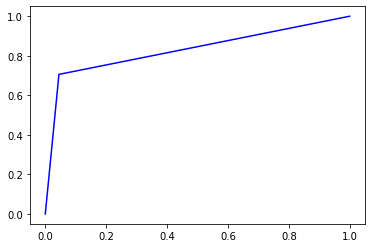

In [17]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [18]:
#https://towardsdatascience.com/interactive-visualization-of-decision-trees-with-jupyter-widgets-ca15dd312084

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [19]:
graph = Source(export_graphviz(mdl, out_file=None
   , feature_names=X_all.columns, class_names=['Common', 'Legendary'] 
   , filled = True))

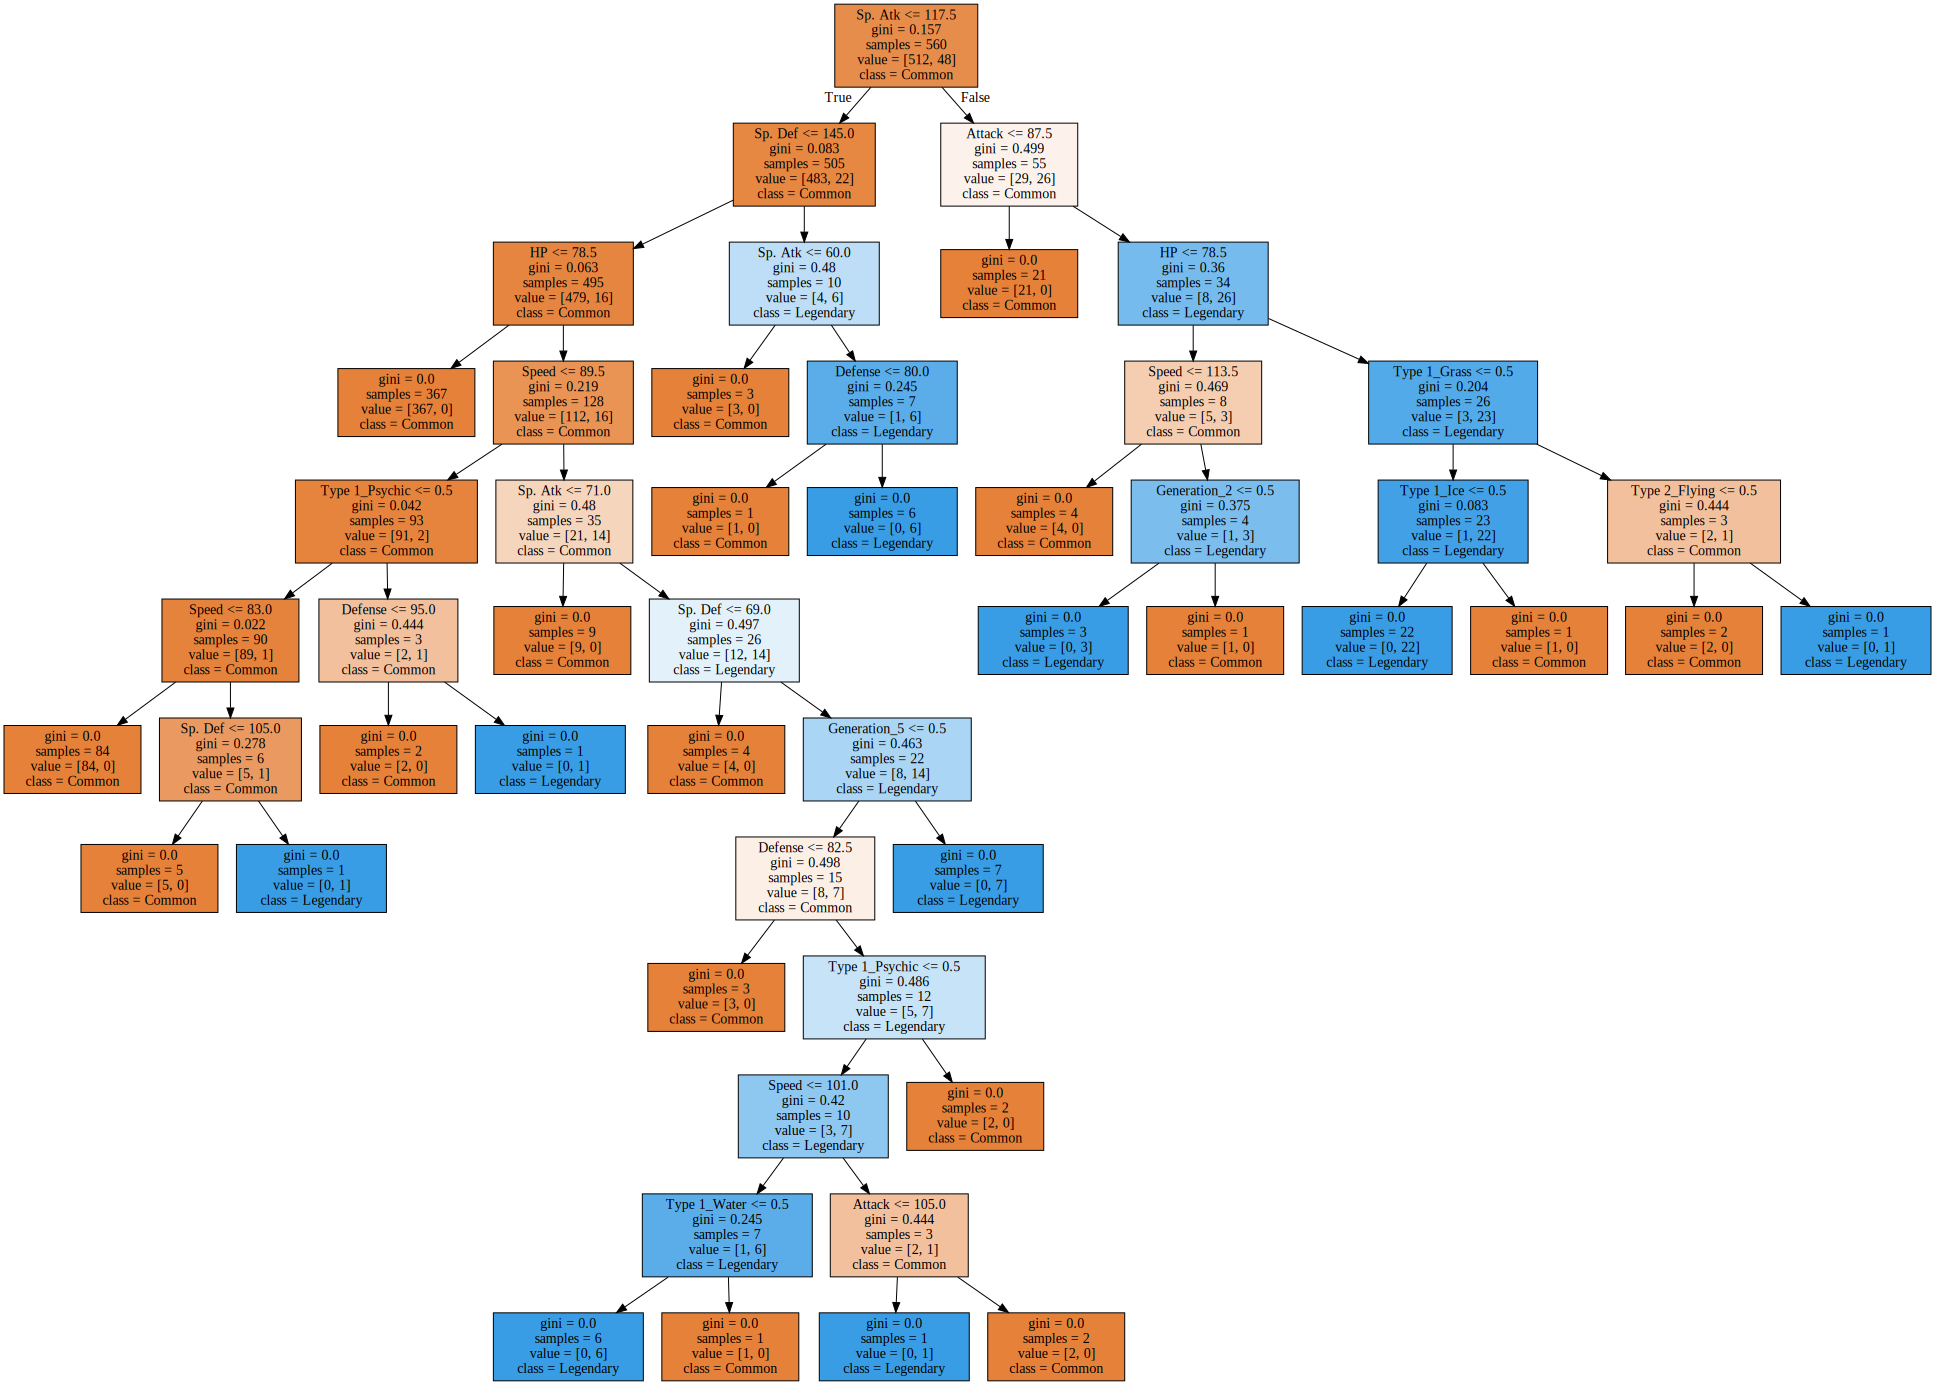

In [20]:
display(SVG(graph.pipe(format='svg')))

In [21]:
from sklearn.externals.six import StringIO 
from IPython.display import Image  
import pydotplus

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


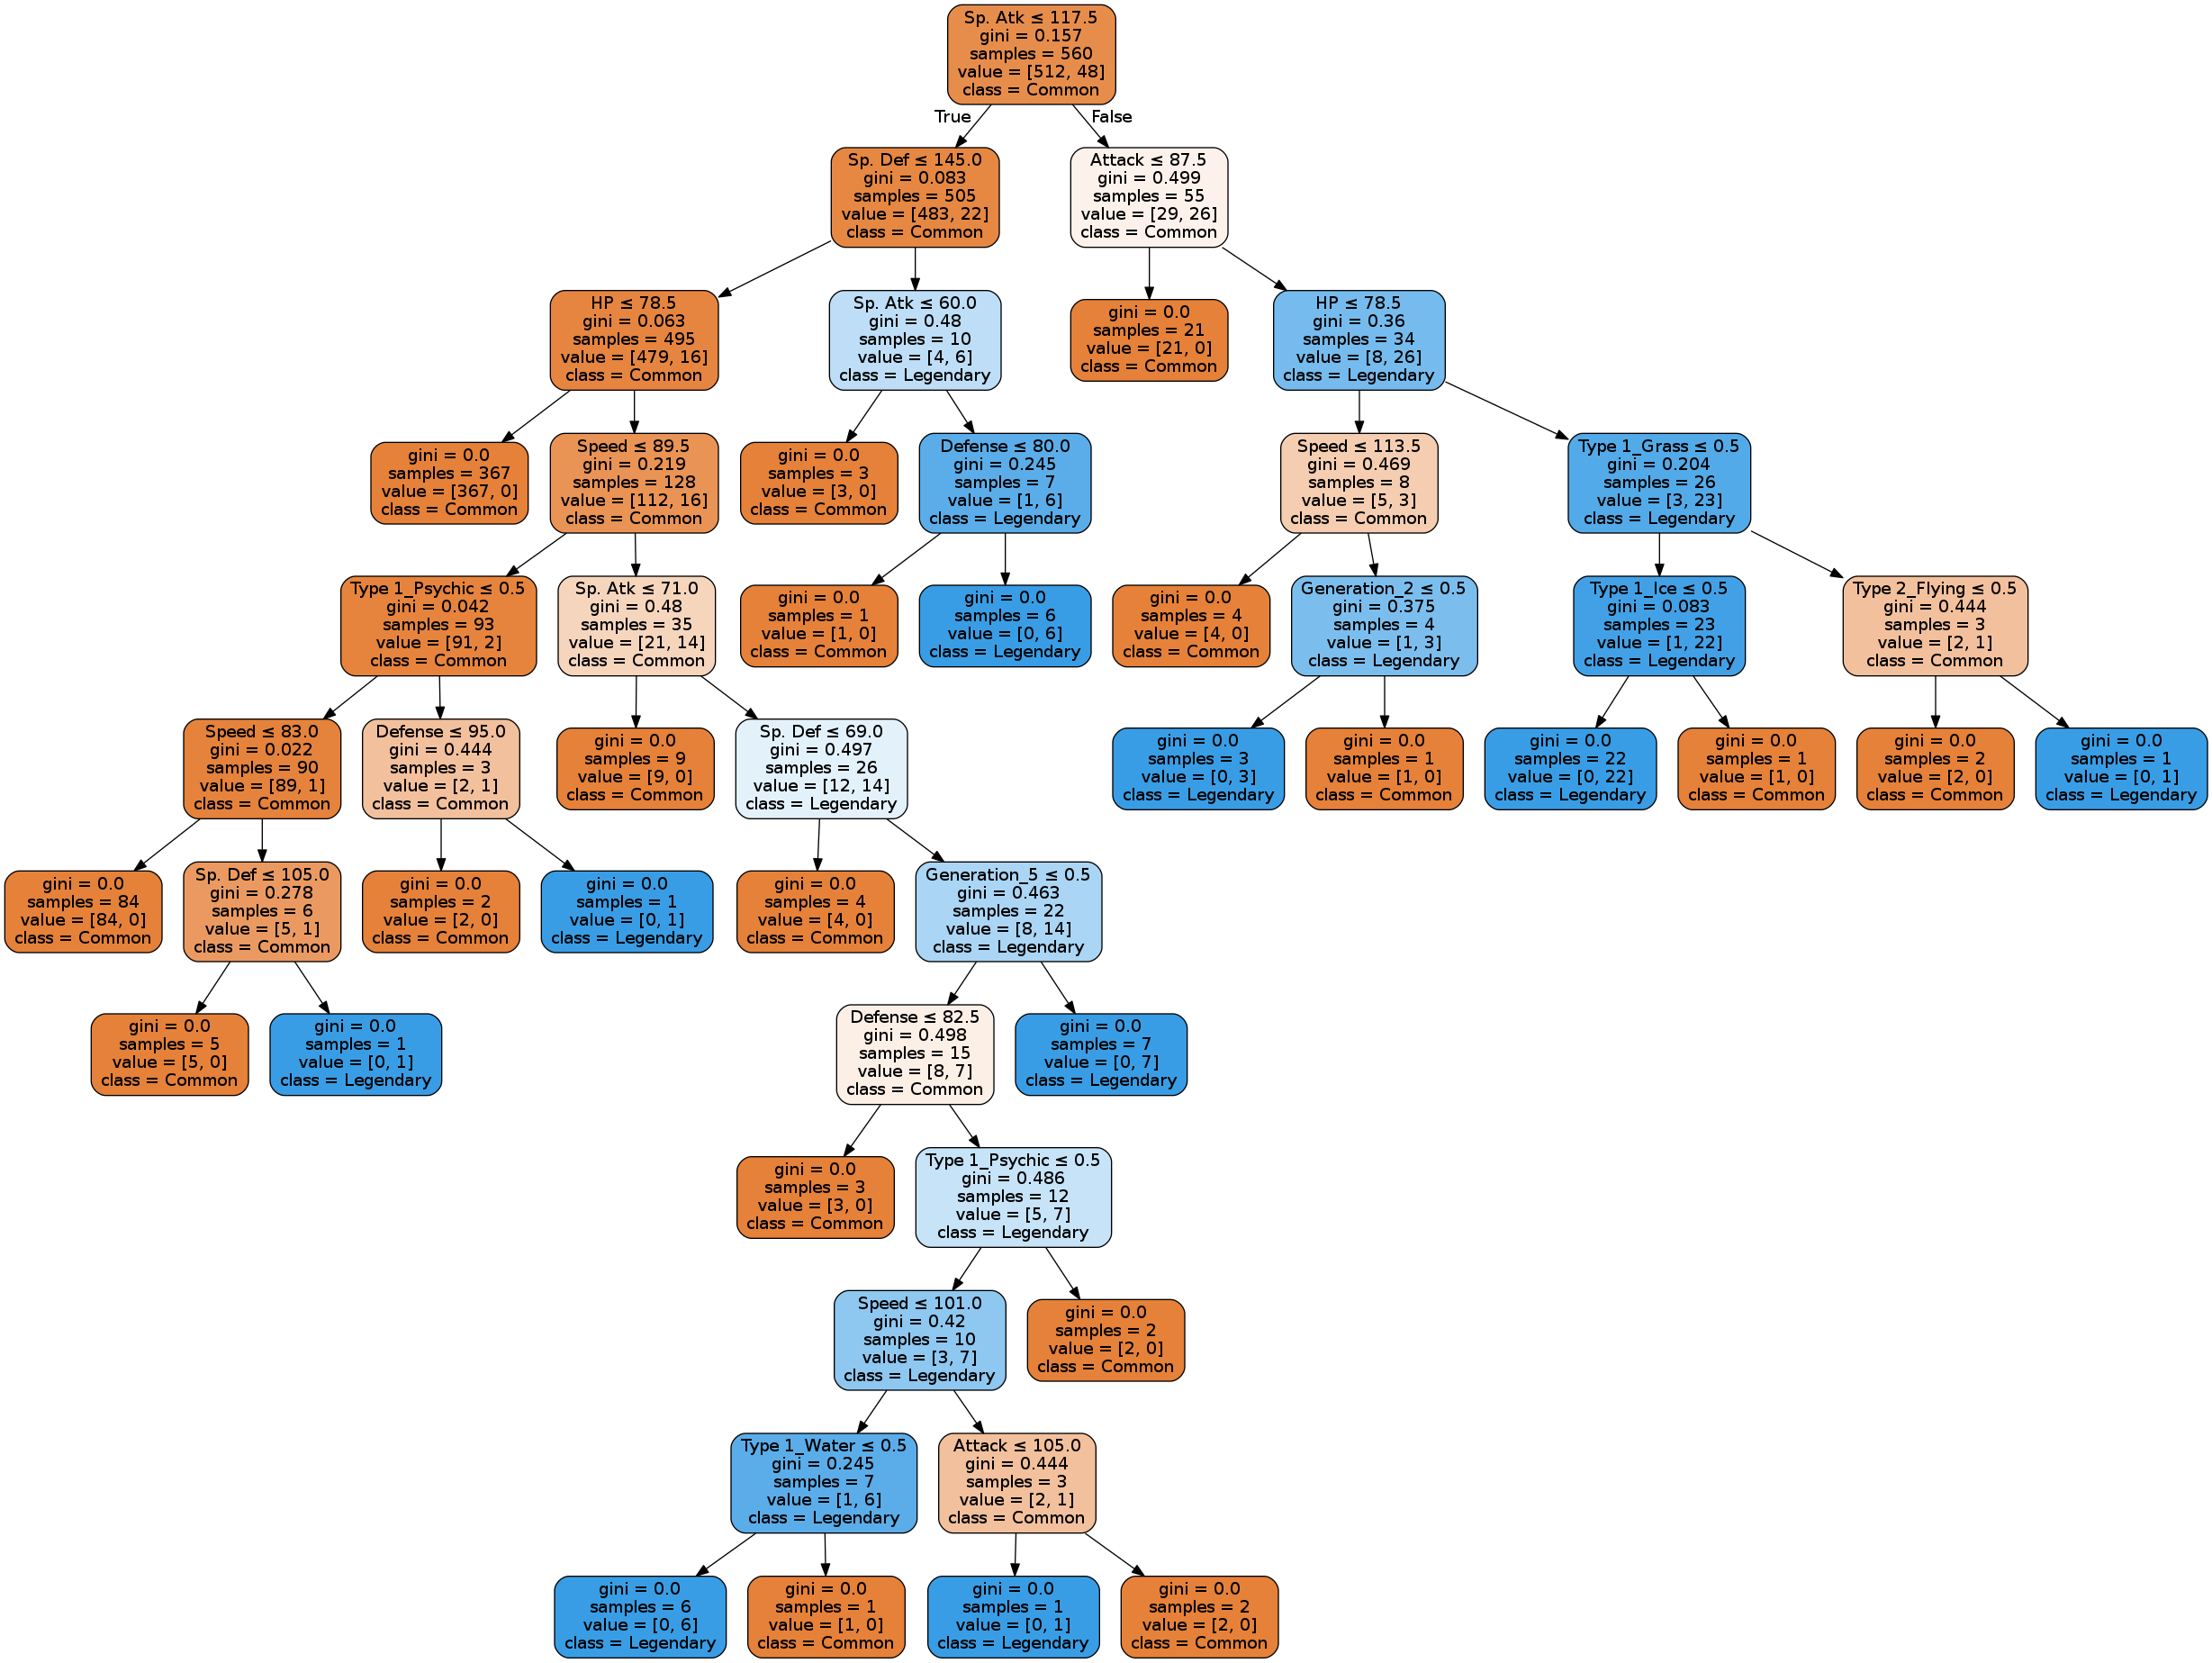

In [22]:
dot_data = StringIO()
export_graphviz(mdl, out_file=dot_data,  
                feature_names=X_all.columns, 
                class_names=['Common', 'Legendary'], 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [23]:
print(export_text(mdl, feature_names=X_all.columns.tolist()))

|--- Sp. Atk <= 117.50
|   |--- Sp. Def <= 145.00
|   |   |--- HP <= 78.50
|   |   |   |--- class: 0
|   |   |--- HP >  78.50
|   |   |   |--- Speed <= 89.50
|   |   |   |   |--- Type 1_Psychic <= 0.50
|   |   |   |   |   |--- Speed <= 83.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Speed >  83.00
|   |   |   |   |   |   |--- Sp. Def <= 105.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Sp. Def >  105.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Type 1_Psychic >  0.50
|   |   |   |   |   |--- Defense <= 95.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Defense >  95.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- Speed >  89.50
|   |   |   |   |--- Sp. Atk <= 71.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Sp. Atk >  71.00
|   |   |   |   |   |--- Sp. Def <= 69.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Sp. Def >  69.00
|   |   |   |   |   |   |--- Gener

# Logistic Regression

In [32]:
X_all = poke_df.drop(["Legendary", "#", "Total"], axis = 1).copy()

In [33]:
X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

In [34]:
X_all.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,45,49,49,65,65,45,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ivysaur,60,62,63,80,80,60,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Venusaur,80,82,83,100,100,80,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
VenusaurMega Venusaur,80,100,123,122,120,80,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Charmander,39,52,43,60,50,65,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
X_all.shape

(800, 48)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
X_all[num_cols]  = StandardScaler().fit_transform(X_all[num_cols])

In [38]:
X_all.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Type 1_Bug,Type 1_Dark,Type 1_Dragon,Type 1_Electric,...,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
Name,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Ivysaur,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Venusaur,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
VenusaurMega Venusaur,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Charmander,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
mdl = LogisticRegression(penalty = "l1", solver = "liblinear")

In [43]:
mdl.fit(Xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
preds = mdl.predict_proba(Xte)[:, 1]

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve

In [46]:
score = roc_auc_score(yte, preds)
score

0.9688736481139542

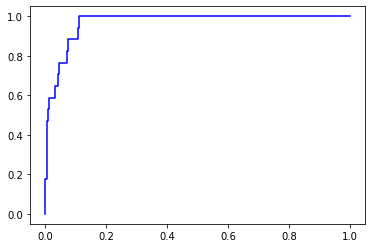

In [47]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [48]:
mdl.coef_.shape

(1, 48)

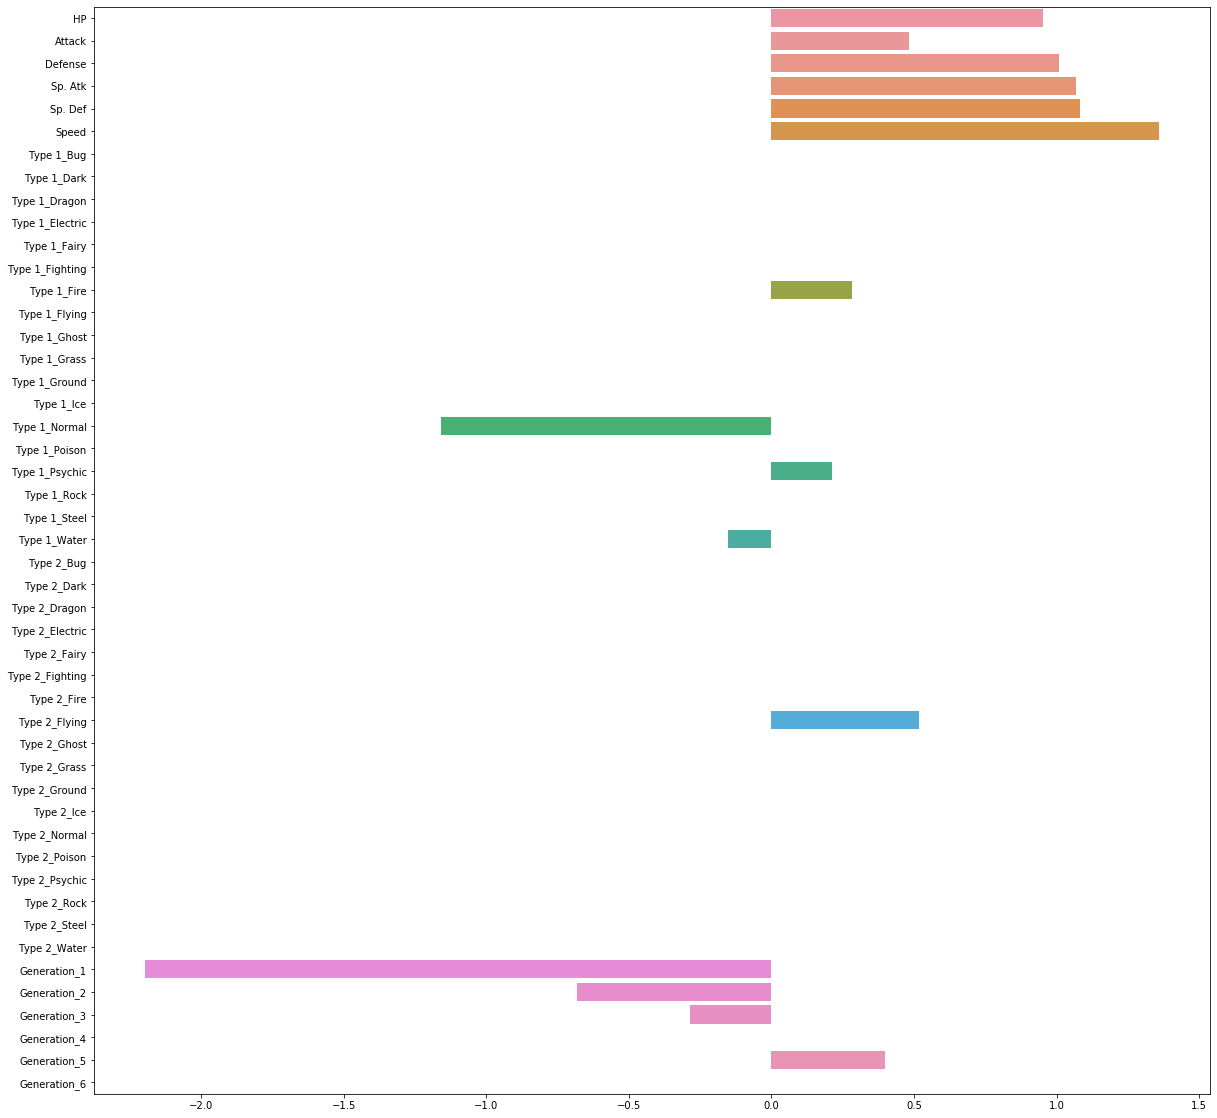

In [49]:
plt.figure(figsize= (20,20))

sns.barplot(y = X_all.columns, x = mdl.coef_[0, :])

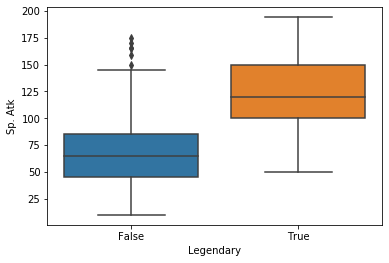

In [53]:
sns.boxplot(y = poke_df["Sp. Atk"], x = poke_df.Legendary)

# RandomForrest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
X_all = poke_df.drop(["Legendary", "#", "Total"], axis = 1).copy()

X_all = X_all.drop(cat_cols, axis=1).join(pd.get_dummies(X_all[cat_cols].astype("category")))

Xtr, Xte, ytr, yte = train_test_split(X_all, y_all, test_size =  0.3, random_state = 777)

In [70]:
mdl = RandomForestClassifier(n_estimators = 100, random_state = 777)

In [71]:
mdl.fit(Xtr, ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=777,
                       verbose=0, warm_start=False)

In [72]:
preds = mdl.predict_proba(Xte)[:, 1]

In [73]:
score = roc_auc_score(yte, preds)
score

0.9670271696122396

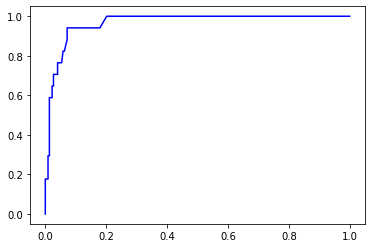

In [74]:
fpr, tpr, threshold = roc_curve(yte, preds)
plt.plot(fpr, tpr, color = "blue" , label = f"AUC:{score:.3f}")

In [75]:
mdl.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=655685735, splitter='best')

In [76]:
def draw_tree(ntree):
    dot_data = StringIO()
    export_graphviz(mdl.estimators_[ntree], out_file=dot_data,  
                    feature_names=X_all.columns, 
                    class_names=['Common', 'Legendary'], 
                    filled=True, rounded=True,
                    special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

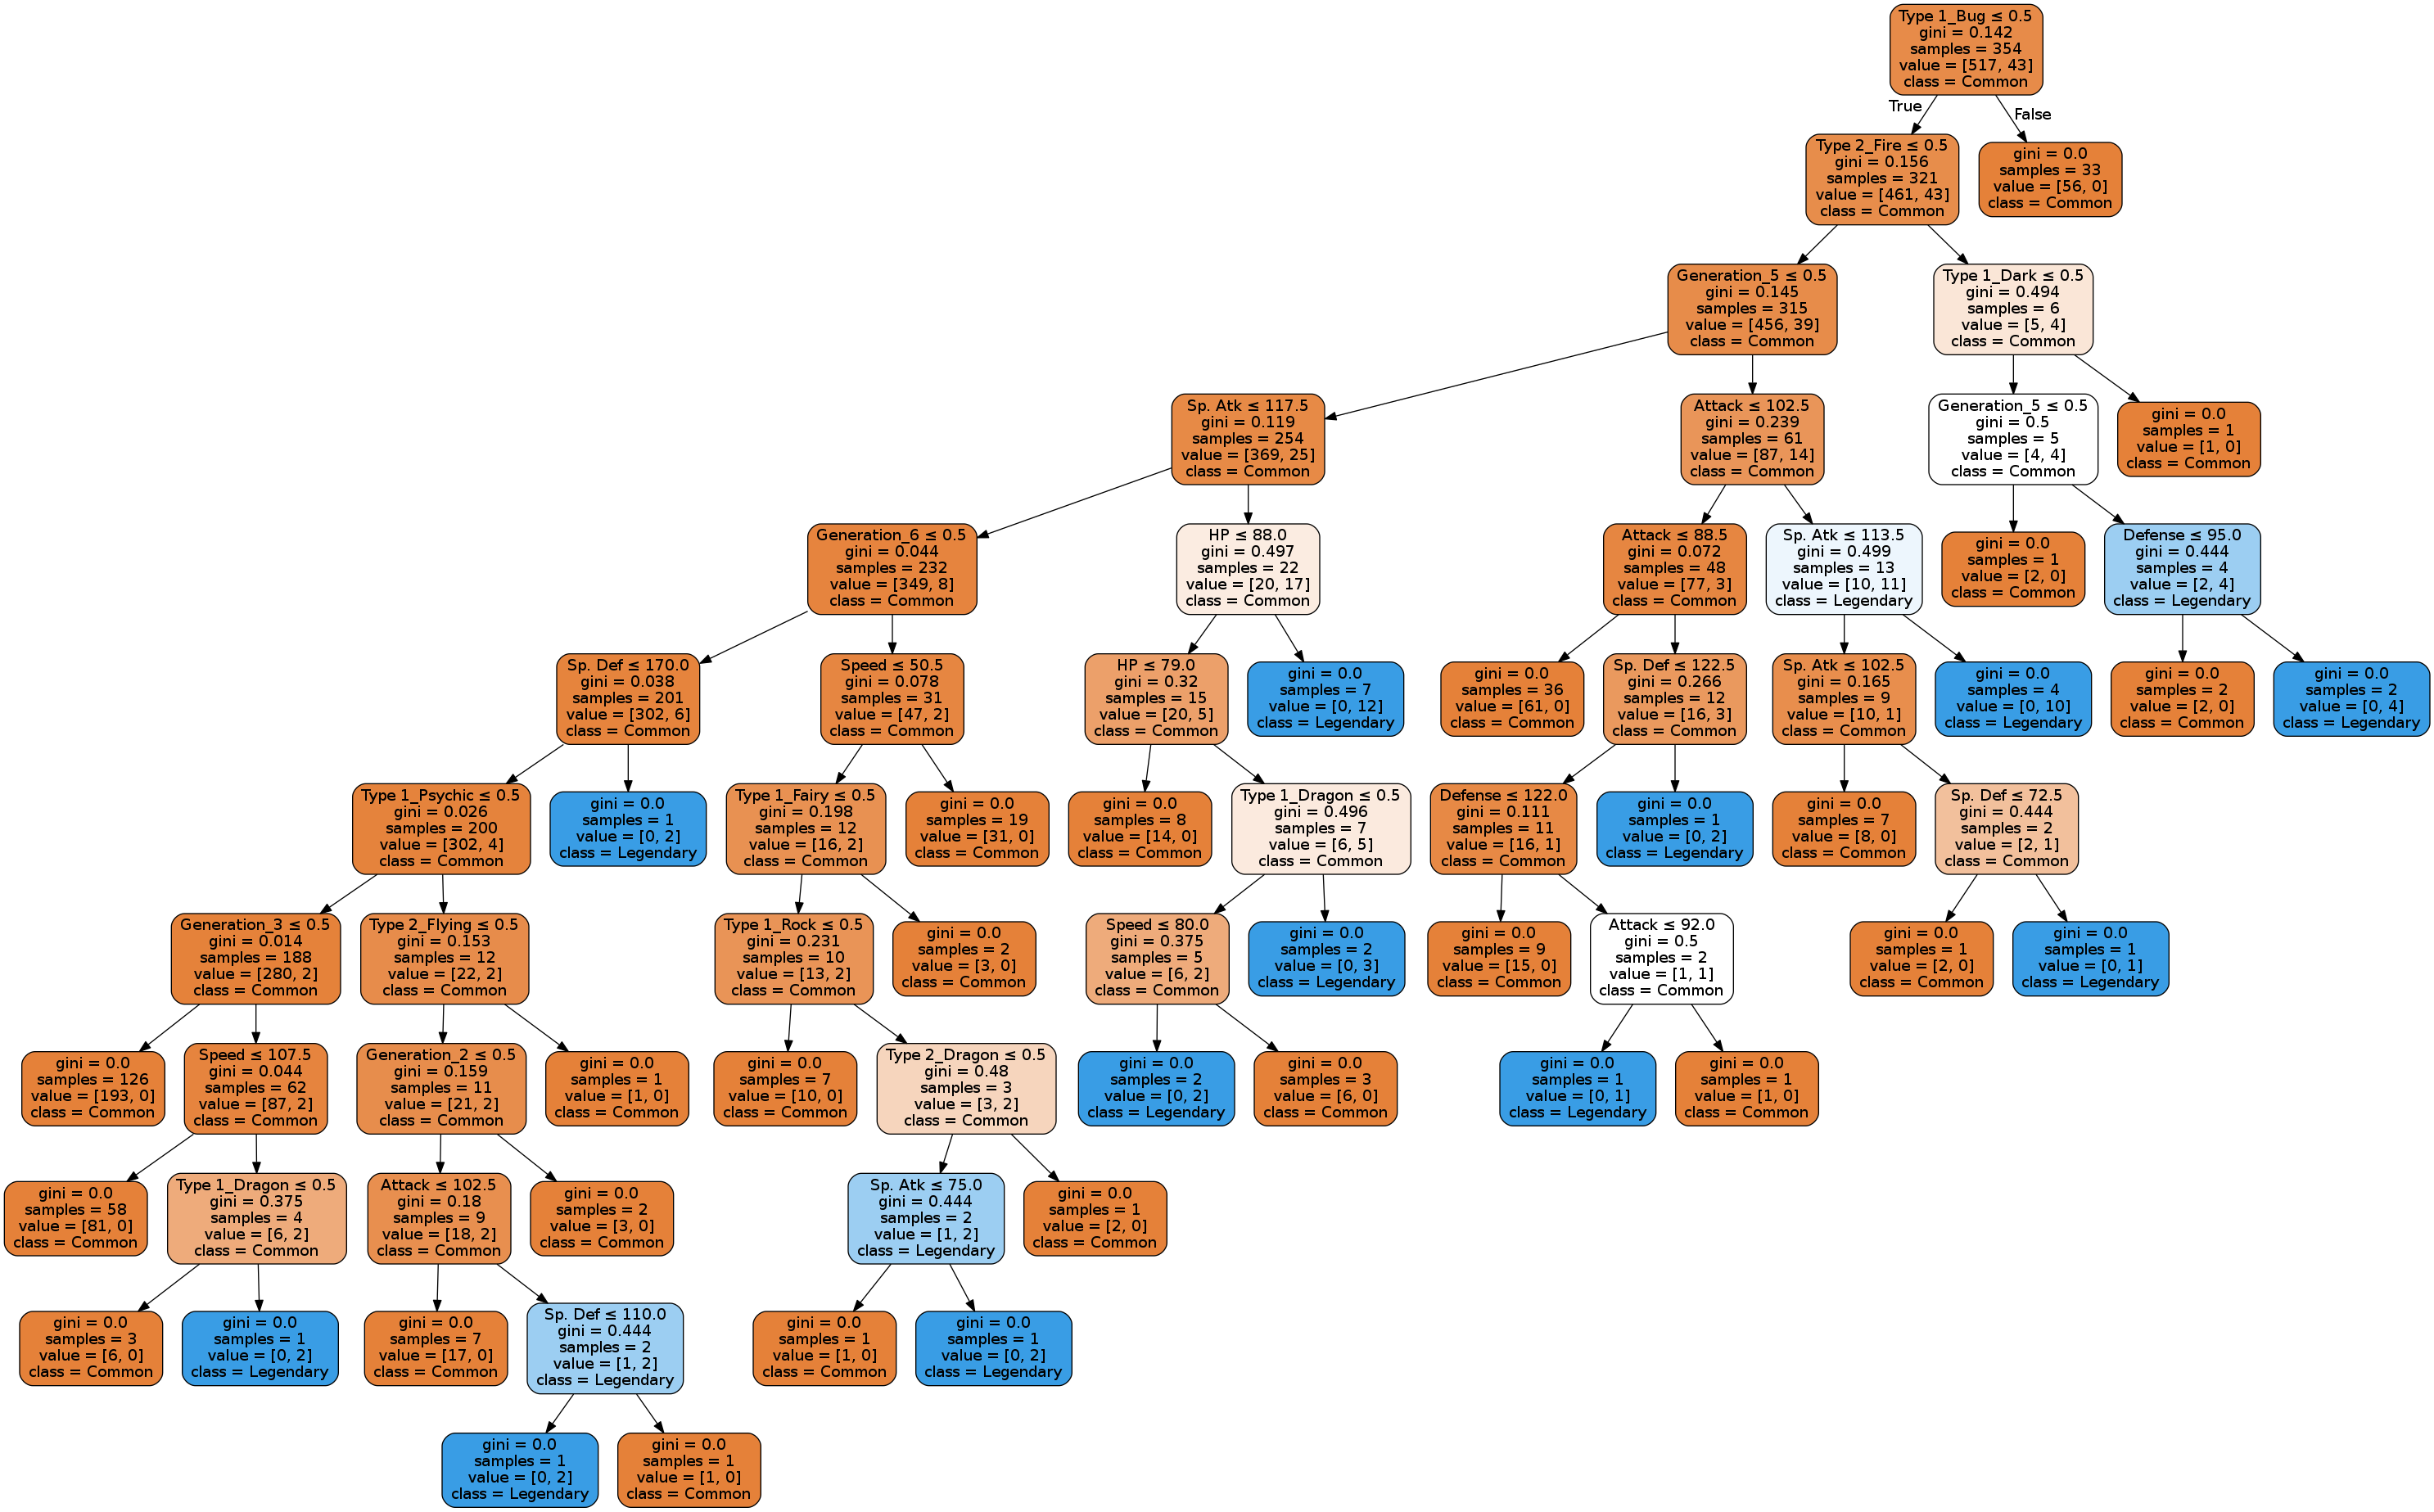

In [77]:
draw_tree( 0)

In [78]:
from ipywidgets import interact
import ipywidgets as widgets

In [79]:
interact(draw_tree, ntree = widgets.IntText(min=0, max = 100, value = 0))

interactive(children=(IntText(value=0, description='ntree'), Output()), _dom_classes=('widget-interact',))

<function __main__.draw_tree(ntree)>

In [80]:
mdl.feature_importances_

array([1.44088259e-01, 1.03295844e-01, 8.92498165e-02, 1.63873332e-01,
       1.23309998e-01, 1.47782588e-01, 3.07065918e-03, 4.11007460e-03,
       1.70919773e-02, 4.10882602e-03, 3.73360851e-04, 8.38999657e-04,
       1.40955757e-02, 4.65108158e-03, 1.70008331e-03, 6.50754299e-03,
       5.76917744e-03, 2.56164896e-03, 7.24469036e-03, 4.73324901e-04,
       2.16881068e-02, 3.86936723e-03, 8.71181272e-03, 9.16742883e-03,
       1.51423380e-05, 1.68192112e-03, 4.78644420e-03, 2.01366415e-05,
       3.01589452e-03, 6.44565144e-03, 4.89605036e-03, 1.01735500e-02,
       3.47721500e-03, 2.39830198e-03, 1.74114892e-03, 1.86989294e-03,
       6.34228742e-05, 1.81332010e-03, 4.97116591e-03, 5.73016935e-04,
       2.75600837e-03, 1.64912978e-03, 1.63890725e-02, 8.12907278e-03,
       8.29872807e-03, 9.92965079e-03, 1.05719628e-02, 6.70052299e-03])

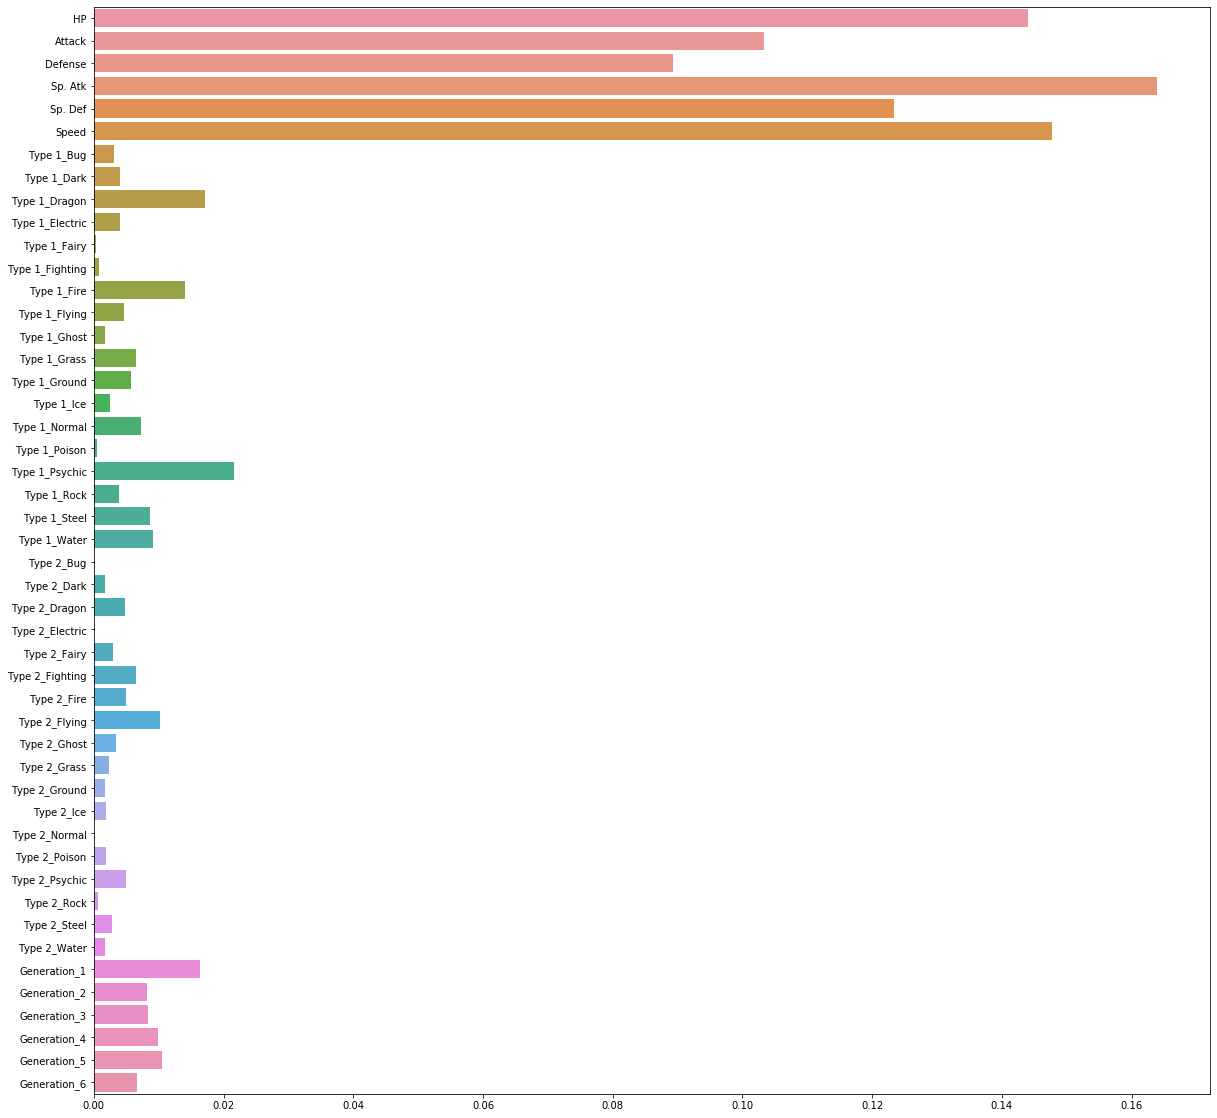

In [81]:
plt.figure(figsize = (20,20))

sns.barplot(x = mdl.feature_importances_, y = X_all.columns.tolist())